In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.externals import joblib

%matplotlib inline

In [2]:
dataset = pd.read_csv('../data/processed/airbnb.csv')

In [3]:
dataset.columns

Index(['latitude', 'longitude', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'price', 'crime_index'],
      dtype='object')

In [4]:
dist_names = {
    'dist_0' : 'Dist. Back Bay T Station',
    'dist_1' : 'Dist. Harvard Square T Station',
    'dist_2' : 'Dist. Museum of Science',
    'dist_3' : 'Dist. Faneuil Hall',
    'dist_4' : 'Dist. Copley Square',
    'dist_5' : 'Dist. Museum of Fine Art',
    'dist_6' : 'Dist. Freedom Trail (start)',
    'dist_7' : 'Dist. Sam Adams',
    'dist_8' : 'Dist. Toyota of Braintree',
    'crime_index' : 'Crime Index'
}

In [5]:
new_cols = []
for col in dataset.columns:
    if col not in dist_names.keys():
        new_cols.append(col)
    else:
        new_cols.append(dist_names[col])

dataset.columns = new_cols

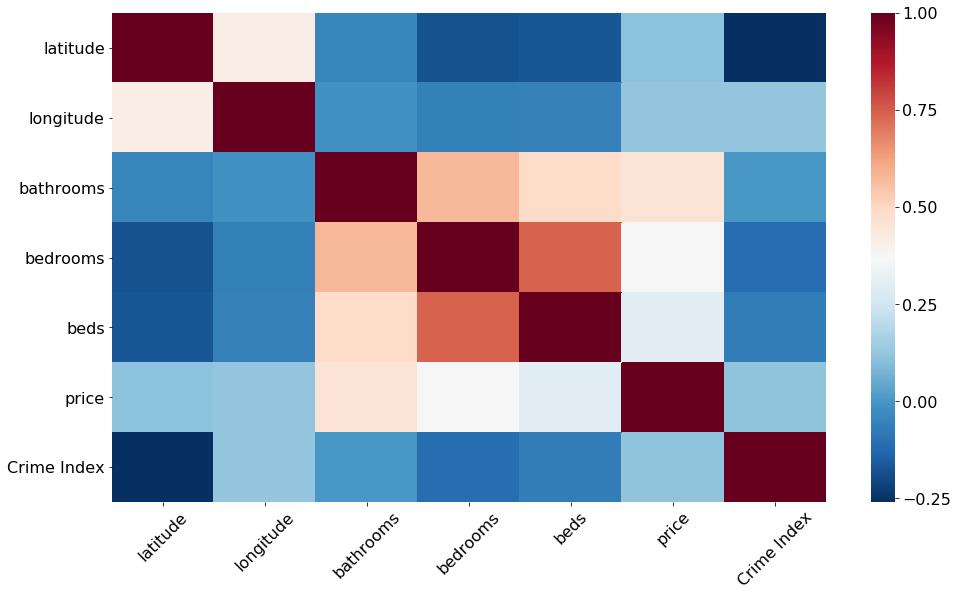

In [6]:
plt.figure(figsize = (16, 9))
plt.rc('font', size = 16)
sns.heatmap(
    dataset.corr(),
    cmap = 'RdBu_r'
)
plt.xticks(rotation = 45)
plt.savefig('../image/feature_correlations.png', bbox_inches = 'tight')

In [7]:
models = []

for i in range(5):
    models.append(
        joblib.load('../models/elastic_net_{}.joblib'.format(i))
    )

In [8]:
coef = np.zeros(len(models[0].coef_))

for model in models:
    coef += model.coef_ / 5.0

In [9]:
coef

array([29.15541617, 24.1523035 , -0.79155652, -6.93200907, -0.55340577,
        0.79637785, -7.21126324, -3.74407945, -5.40133615,  0.24097439,
        0.30123895])

In [10]:
features = ['Bedrooms', 'Bathrooms', 'Crime Index', 
            'dist_0', 'dist_1', 'dist_2', 'dist_3', 
            'dist_4', 'dist_5', 'dist_6', 'dist_7']

named_features = []
for feature in features:
    if feature in dist_names.keys():
        named_features.append(dist_names[feature])
    else:
        named_features.append(feature)

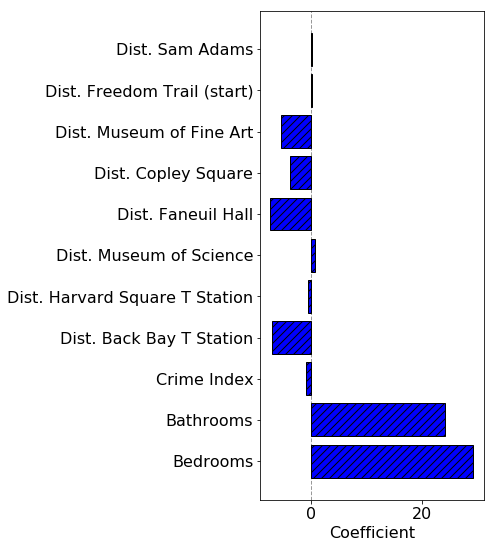

In [11]:
plt.figure(figsize = (4, 9))
plt.barh(
    named_features, 
    coef, 
    edgecolor = 'k',
    hatch = '///',
    color = 'blue'
)
plt.axvline(0, linewidth = 1, linestyle = '--', color = 'k', alpha = 0.4)
plt.xlabel('Coefficient')
plt.savefig('../image/linear_coef.png', bbox_inches = 'tight')

In [12]:
crime_kde = joblib.load('../models/crime_kde.joblib')

In [13]:
lat_points = np.linspace(dataset['latitude'].min(), dataset['latitude'].max(), 60)
long_points = np.linspace(dataset['longitude'].min(), dataset['longitude'].max(), 60)

In [14]:
lat_points

array([42.23596855, 42.23864103, 42.24131351, 42.243986  , 42.24665848,
       42.24933097, 42.25200345, 42.25467593, 42.25734842, 42.2600209 ,
       42.26269338, 42.26536587, 42.26803835, 42.27071083, 42.27338332,
       42.2760558 , 42.27872828, 42.28140077, 42.28407325, 42.28674574,
       42.28941822, 42.2920907 , 42.29476319, 42.29743567, 42.30010815,
       42.30278064, 42.30545312, 42.3081256 , 42.31079809, 42.31347057,
       42.31614305, 42.31881554, 42.32148802, 42.32416051, 42.32683299,
       42.32950547, 42.33217796, 42.33485044, 42.33752292, 42.34019541,
       42.34286789, 42.34554037, 42.34821286, 42.35088534, 42.35355782,
       42.35623031, 42.35890279, 42.36157527, 42.36424776, 42.36692024,
       42.36959273, 42.37226521, 42.37493769, 42.37761018, 42.38028266,
       42.38295514, 42.38562763, 42.38830011, 42.39097259, 42.39364508])

In [15]:
long_points

array([-71.17320731, -71.17023435, -71.16726138, -71.16428841,
       -71.16131545, -71.15834248, -71.15536951, -71.15239654,
       -71.14942358, -71.14645061, -71.14347764, -71.14050468,
       -71.13753171, -71.13455874, -71.13158578, -71.12861281,
       -71.12563984, -71.12266687, -71.11969391, -71.11672094,
       -71.11374797, -71.11077501, -71.10780204, -71.10482907,
       -71.1018561 , -71.09888314, -71.09591017, -71.0929372 ,
       -71.08996424, -71.08699127, -71.0840183 , -71.08104534,
       -71.07807237, -71.0750994 , -71.07212643, -71.06915347,
       -71.0661805 , -71.06320753, -71.06023457, -71.0572616 ,
       -71.05428863, -71.05131566, -71.0483427 , -71.04536973,
       -71.04239676, -71.0394238 , -71.03645083, -71.03347786,
       -71.0305049 , -71.02753193, -71.02455896, -71.02158599,
       -71.01861303, -71.01564006, -71.01266709, -71.00969413,
       -71.00672116, -71.00374819, -71.00077522, -70.99780226])

In [16]:
grid = np.zeros((60, 60, 2))
crime = np.zeros((60, 60))

In [17]:
for i in range(60):
    for j in range(60):
        grid[i, j] = np.array([lat_points[i], long_points[j]])
        crime[i, j] = crime_kde.score_samples(grid[i,j].reshape(1, -1))

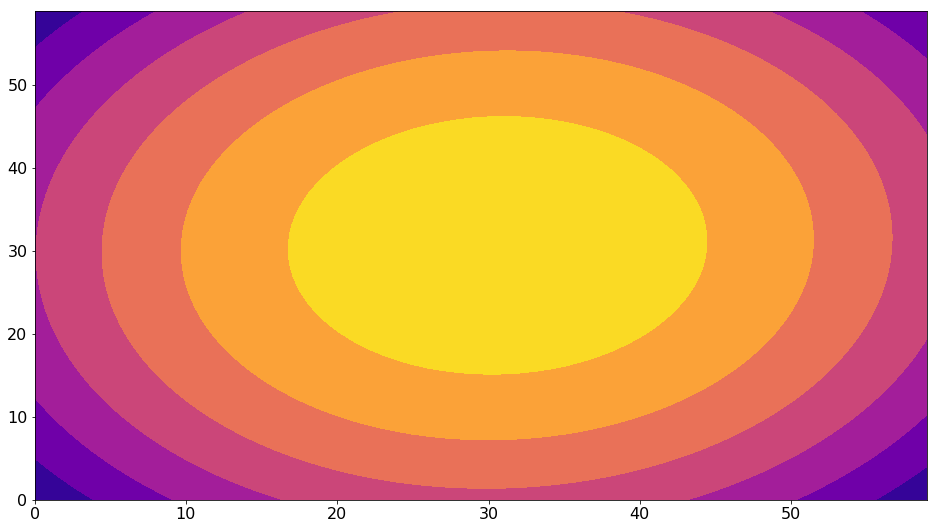

In [18]:
plt.figure(figsize = (16, 9))
plt.contourf(crime, cmap = 'plasma')

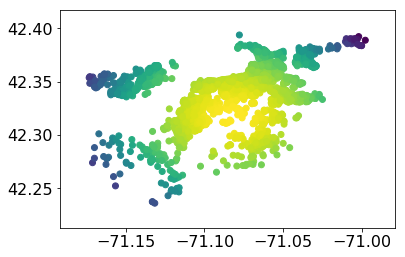

In [21]:
plt.scatter(
    dataset['longitude'],
    dataset['latitude'],
    c = dataset['Crime Index']
)